## Read advertising.csv

In [127]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import norm, t
from statsmodels.stats.proportion import proportions_ztest, proportion_confint


In [22]:
df = pd.read_csv('advertising.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Comparing Proportions (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Click on Ad.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [9]:
df['Male'].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

0    519
1    481
Name: Male, dtype: int64

In [13]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

0    500
1    500
Name: Clicked on Ad, dtype: int64

<Axes: xlabel='Clicked on Ad', ylabel='count'>

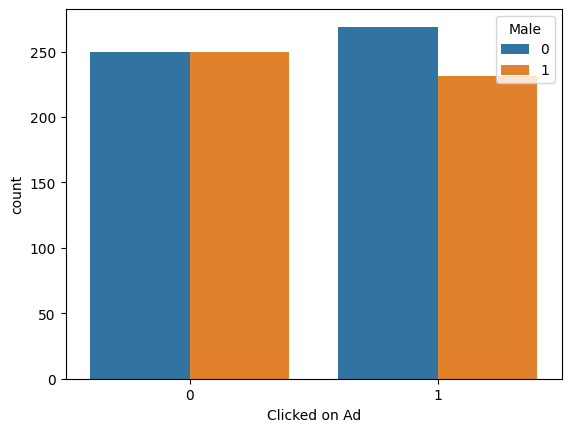

In [116]:
sns.countplot(x='Clicked on Ad', data=df,hue='Male')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

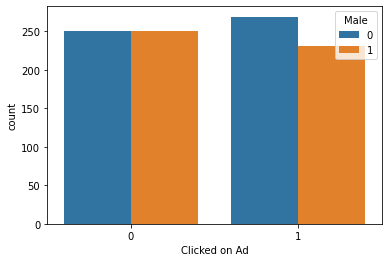

<Axes: xlabel='Male', ylabel='count'>

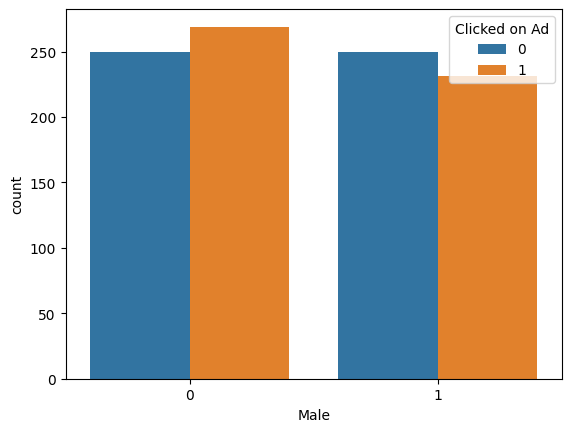

In [117]:
sns.countplot(x='Male', data=df,hue='Clicked on Ad')

<AxesSubplot:xlabel='Male', ylabel='Clicked on Ad'>

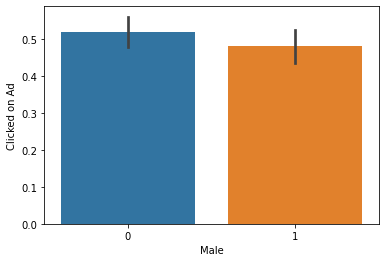

In [118]:
male_clicked_counts = df.groupby(['Male', 'Clicked on Ad'])
print(male_clicked_counts)

In [199]:
df_male = pd.DataFrame(df.groupby('Male')['Clicked on Ad'].count())
df_male

,Clicked on Ad
Male,
0,519
1,481


,Clicked on Ad
Male,
0,519
1,481


In [123]:
clicked_on_ad_male_counts = df[df['Clicked on Ad'] == 1]['Male'].value_counts()
print(clicked_on_ad_male_counts)

Male
0    269
1    231
Name: count, dtype: int64


In [201]:
proportion = df_male /df_male.sum()
proportion

,Clicked on Ad
Male,
0,0.519
1,0.481


,Clicked on Ad
Male,
0,0.518304
1,0.480249


In [14]:
## CI


Difference in proportion: 0.0383
95% CI: [-0.02367968847313774, 0.10027968847313774]


In [15]:
## Using Calculation steps


z_score: 1.211170979546546
p_value: 0.2258298825298657


***Since p-value > alpha therefore we cannot reject null hypothesis***

In [203]:
proportion_male = proportion.loc[1,'Clicked on Ad']
proportion_female = proportion.loc[0,'Clicked on Ad']

In [205]:
diff = proportion_female - proportion_male
print(f'difference in prop {diff}')
ci_lower = diff - 1.96 * se_difference
ci_upper = diff + 1.96 * se_difference
print(f'95% CI:{ci_lower}, {ci_upper})')

difference in prop 0.038000000000000034
95% CI:-0.02398031773329573, 0.0999803177332958)


In [245]:
male_clicked = df[df['Male'] == 1]['Clicked on Ad']
female_clicked = df[df['Male'] == 0]['Clicked on Ad']
prop_male = male_clicked.mean()
prop_female = female_clicked.mean()
n_male = len(male_clicked)
n_female = len(female_clicked)
se_difference = np.sqrt((prop_male * (1 - prop_male) / n_male) + (prop_female * (1 - prop_female) / n_female))
t_score = (prop_female - prop_male) / se_difference
degrees_of_freedom = n_male + n_female - 2
p_value_t = 2 * (1 - t.cdf(t_score, df=degrees_of_freedom))
print(f't_score: {t_score}')
print(f'p_value: {p_value_t}')

t_score: 1.203409523753369
p_value: 0.22910326213314347


**Since p-value > alpha
therefore we cannot reject null hypothesis**

In [16]:
## Using scipy.stats.ttest_ind()


Ttest_indResult(statistic=1.2022004765958763, pvalue=0.22957103161130843)

In [134]:
t_stat, p_value_t = ttest_ind(female_clicked,male_clicked,alternative='two-sided', equal_var=False)
print(f't_stat: {t_stat}')
print(f'p_value: {p_value_t}')

t_stat: 1.202202029513623
p_value: 0.22957208126839102


## Comparing Means (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Click on Ad.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [ ]:
#HO :There is no difference between Male and Female regarding Click on Ad
#H1 :There is  difference between Male and Female regarding Click on Ad


In [106]:
male_clicked = df[df['Male'] == 1]['Clicked on Ad']
female_clicked = df[df['Male'] == 0]['Clicked on Ad']


In [109]:
print(male_clicked)

1      0
3      0
5      0
7      1
8      0
      ..
991    1
993    0
995    1
996    1
997    1
Name: Clicked on Ad, Length: 481, dtype: int64


In [110]:
male_clicked.value_counts()

Clicked on Ad
0    250
1    231
Name: count, dtype: int64

In [140]:
df['Male'].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

0    519
1    481
Name: Male, dtype: int64

<Axes: xlabel='Male', ylabel='Daily Time Spent on Site'>

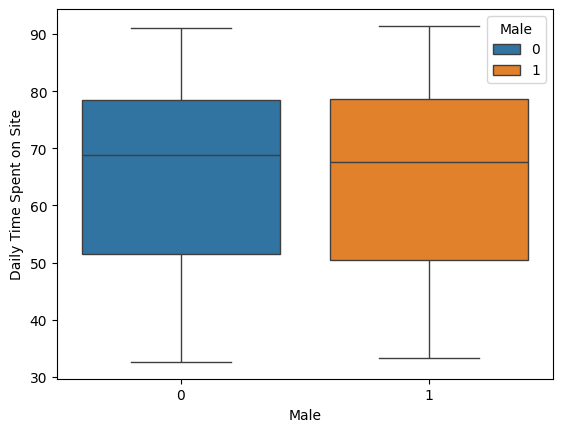

In [142]:
sns.boxplot(x='Male', y='Daily Time Spent on Site', data=df,hue='Male')

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

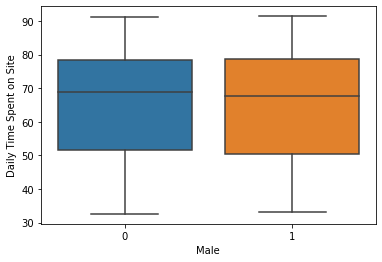

<Axes: xlabel='Male', ylabel='Daily Time Spent on Site'>

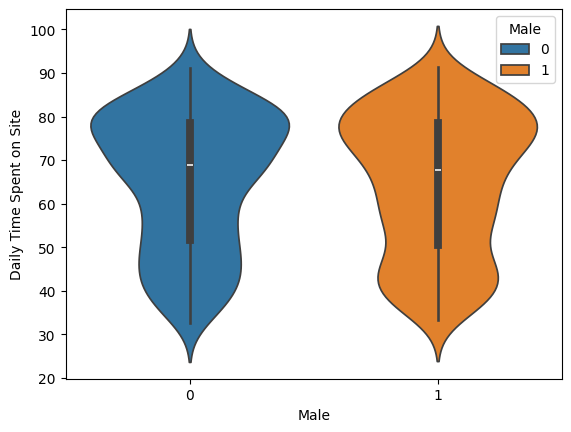

In [144]:
sns.violinplot(x='Male', y='Daily Time Spent on Site', data=df,hue='Male')


<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

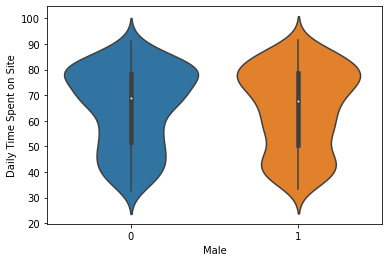

<Axes: xlabel='Male', ylabel='Daily Time Spent on Site'>

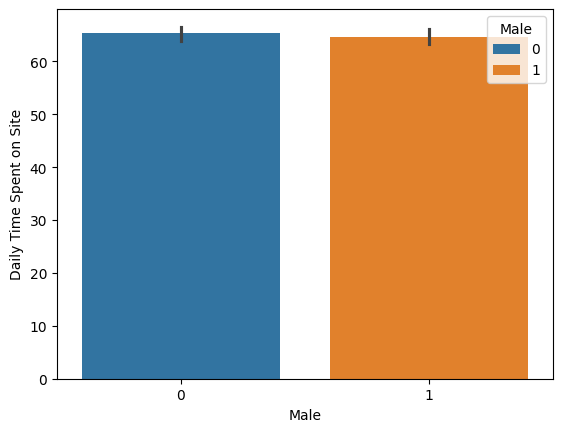

In [145]:
sns.barplot(x='Male', y='Daily Time Spent on Site', data=df,hue='Male')

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

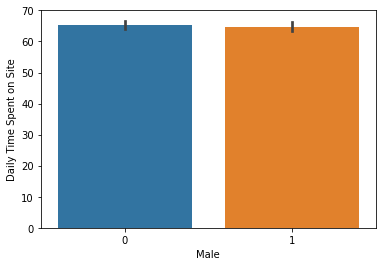

In [207]:
df_male_site = pd.DataFrame(df.groupby('Male')['Daily Time Spent on Site'].mean())
df_male_site

,Daily Time Spent on Site
Male,
0,65.289287
1,64.688274


,Daily Time Spent on Site
Male,
0,65.289287
1,64.688274


In [208]:
df_male_site = pd.DataFrame(df.groupby('Male')['Daily Time Spent on Site'].std())
df_male_site

,Daily Time Spent on Site
Male,
0,15.623040
1,16.109163


,Daily Time Spent on Site
Male,
0,15.623040
1,16.109163


In [243]:
df_male_site = pd.DataFrame(df.groupby('Male')['Daily Time Spent on Site'])

In [ ]:
m0=df_male_site.loc

In [25]:
## CI

Difference in mean: 0.6010129999999947
95% CI: [-1.3709224295437132, 2.5729484295437026]


In [238]:
np.random.seed(42)
mean_male = male_clicked.mean()
mean_female = female_clicked.mean()
diff = mean_female - mean_male
print(f'difference in mean {diff}')
se_difference = ((std_male**2 / male_clicked.count()) + (std_female**2 / female_clicked.count()))**0.5
ci_lower = diff - 1.96 * se_difference
ci_upper = diff + 1.96 * se_difference
print(f'95% CI:{ci_lower}, {ci_upper})')
null_hypothesis_mean_diff = 0
t_score= (mean_male - mean_female - null_hypothesis_mean_diff) / se_difference
degrees_of_freedom = male_clicked.count() + female_clicked.count() - 2
p_value_t = 2 * (1 - t.cdf(t_value, df=degrees_of_freedom))
alpha = 0.05
print(f't_score: {t_score:}')
print(f'p_value: {p_value}')

difference in mean 0.038054951349748956
95% CI:-0.023987619544665537, 0.10009752224416345)
t_score: -1.202202029513623
p_value: 0.014323197423499238


In [26]:
## Using Calculation steps


t_score: 0.5980896455209542
p_value: 0.5499158167679443


In [46]:
print(ttest_ind(male_clicked, female_clicked))

TtestResult(statistic=-1.2022004765958763, pvalue=0.22957103161130848, df=998.0)


In [27]:
## Using scipy.stats.ttest_ind()


Ttest_indResult(statistic=0.5987865950462051, pvalue=0.5494510852945214)

## Paired t-test
### Check for significant difference in Daily Time Spent on Site in April and May.
### Solve using the calculation steps and confirm using "scipy.stats.ttest_rel()"
### Write your conclusion.
##### Hint: In this exercise we suppose we compare the Daily Time Spent on Site in April and May for the same people. That is why we selected April and May because it has the same value counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 86.1+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,date
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03 03:36:18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 86.1+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,date
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03 03:36:18


2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: month, dtype: int64

,month,Daily Time Spent on Site
0,3,68.95
1,4,80.23
2,3,69.47
3,1,74.15
4,6,68.37


In [221]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
april_data = df[df['Timestamp'].dt.month == 4]['Daily Time Spent on Site']
may_data = df[df['Timestamp'].dt.month == 5]['Daily Time Spent on Site']
mean_april = april_data.mean()
mean_may = may_data.mean()
diff = mean_may - mean_april
std_april = april_data.std()
std_may = may_data.std()
print(f'difference in mean {diff}')
se_difference = ((std_april**2 / april_data.count()) + (std_may**2 / may_data.count()))**0.5
main_std = diff.std()
#n = diff.count()
#se = std / npsqrt(n)
print(f'S.E: {se_difference}')
ci_lower = diff - 1.96 * se_difference
ci_upper = diff + 1.96 * se_difference
print(f'95% CI:{ci_lower}, {ci_upper})')

difference in mean -1.6135374149660038
S.E: 1.8682401540388407
95% CI:-5.275288116882131, 2.0482132869501237)


In [219]:
null_hypothesis_mean_diff = 0
t_score= (mean_male - mean_female - null_hypothesis_mean_diff) / se_difference
degrees_of_freedom = male_clicked.count() + female_clicked.count() - 2
p_value_t = 2 * (1 - t.cdf(t_value, df=degrees_of_freedom))
alpha = 0.05
print(f't_score: {t_score:}')
print(f'p_value: {p_value}')

t_score: -0.020369410895853056
p_value: 0.014323197423499238


In [47]:
# Using Steps


mean of diffs.: -1.613537414965986
S.E: 1.7810750769712742
t_score: -0.9059345312437999
p_value: 0.36646315120526873


In [49]:
# using ttest_rel


Ttest_relResult(statistic=-0.9059345312438, pvalue=0.36646315120526884)

In [228]:
from scipy.stats import ttest_rel

In [231]:
t_stat, p_value_t = ttest_rel(may_data,april_data)
print(ttest_rel(april_data, may_data))

TtestResult(statistic=0.9059345312438, pvalue=0.36646315120526884, df=146)


## Chi-Squared Distribution    (Optional Exercise)
### Draw 10 different random sample of size = 1000 from standard normal distribution.
### Derive a Chi-square distribution of k=1,2,....10 using these samples.
### Plot your results.
### Compare with the one from scipy.stats.chi2()
### You can also compare with the one from np.random.chisquare()

## Chi-square goodness of fit
### Create a new column that contain the month.
### Check if all existing months are equally distributed.
### Confirm using from scipy.stats.chisquare()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Age Group                 1000 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 79

In [83]:
df['date'] = pd.to_datetime(df['Timestamp'])
df['month'] = df['date'].dt.month

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Age Group                 1000 non-null   category      
 11  date                      1000 non-null   datetime64[ns]
 12  month                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
 11  month                     1000 non-null   int64         
dtypes: datetime64[ns](1),

In [84]:
month_distribution = df['month'].value_counts()
print(month_distribution)

month
2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: count, dtype: int64


2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: month, dtype: int64

<Axes: xlabel='month', ylabel='count'>

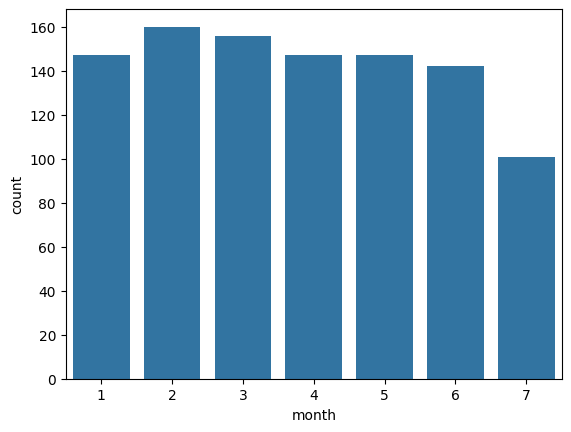

In [88]:
sns.countplot(x=df['month'])

<AxesSubplot:xlabel='month', ylabel='count'>

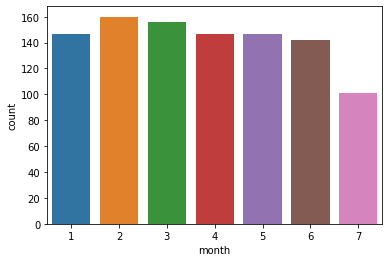

In [46]:
# using steps


Chi_Square_Score: 15.896
p-value: 0.01432319742349919


In [186]:
df['date'] = pd.to_datetime(df['Timestamp'])
df['month'] = df['date'].dt.month

month_distribution = df['month'].value_counts()
observed_frequencies = month_distribution.values
expected_frequency = len(df) / len (month_distribution)
chi2_statistic = np.sum((observed_frequencies - expected_frequency) ** 2) / expected_frequency
degree_of_freedom = len(month_distribution) - 1
critical_chi2 = chi2.ppf(0.95,degree_of_freedom)
p_value = 1 - chi2.cdf(chi2_statistic,degree_of_freedom)
print(f"chi2_statistic {chi2_statistic}")
print(f"P-value: {p_value}")


chi2_statistic 15.896
P-value: 0.01432319742349919


**since p-value < alpha
therefore reject null hypthothesis can be rejected**

In [47]:
# using chisquare


Chi_Square_Score: 15.896
p-value: 0.01432319742349924


In [189]:
chi2_stat, p_value = chisquare(month_distribution, f_exp=expected_frequency)
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Chi-square Statistic: 15.896
P-value: 0.014323197423499238


## Chi-square test of independence
### Check if there is a significant relation between "Clicked on Ad" and "month".
### Use from scipy.stats.chi2_contingency() only.
### Write your conclusion

In [112]:
from scipy.stats import chi2_contingency

<Axes: xlabel='Clicked on Ad', ylabel='count'>

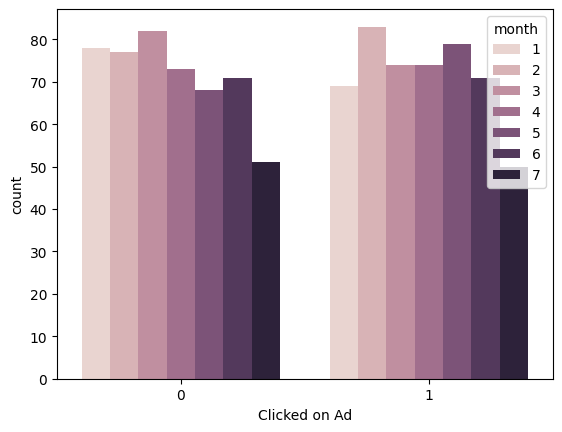

In [149]:
sns.countplot(x='Clicked on Ad', data=df,hue='month')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

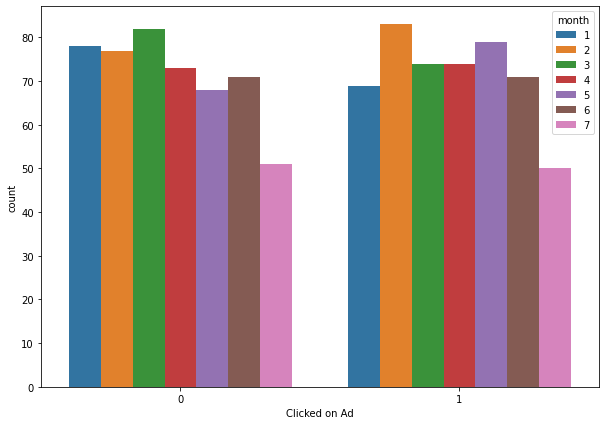

<Axes: xlabel='month', ylabel='Clicked on Ad'>

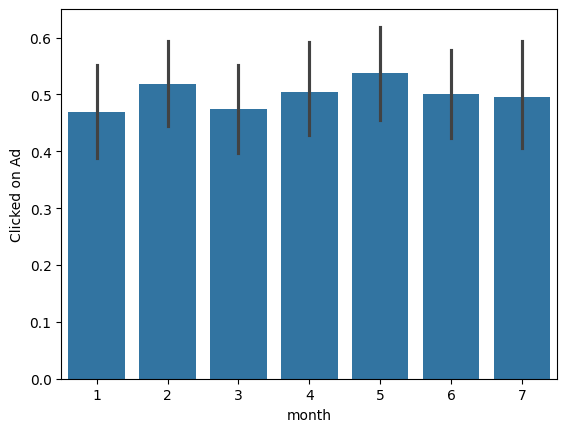

In [191]:
sns.barplot(x=df['month'],y=df['Clicked on Ad'])

<AxesSubplot:xlabel='month', ylabel='Clicked on Ad'>

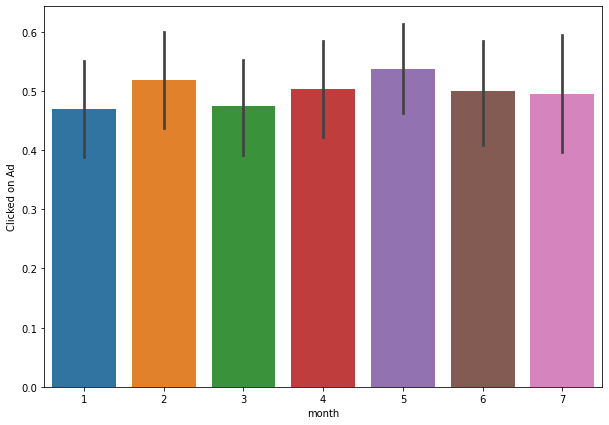

In [196]:
clicked_contingency = pd.crosstab(df['month'],df['Clicked on Ad'])
clicked_contingency

Clicked on Ad,0,1
month,,
1,78,69
2,77,83
3,82,74
4,73,74
5,68,79
6,71,71
7,51,50


Clicked on Ad,0,1
month,,
1,78,69
2,77,83
3,82,74
4,73,74
5,68,79
6,71,71
7,51,50


<Axes: xlabel='Clicked on Ad', ylabel='month'>

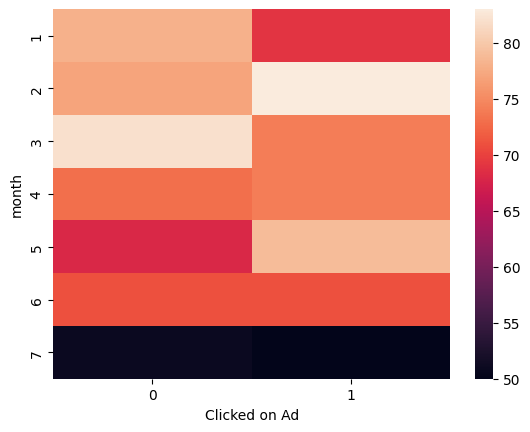

In [197]:
sns.heatmap(clicked_contingency)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='month'>

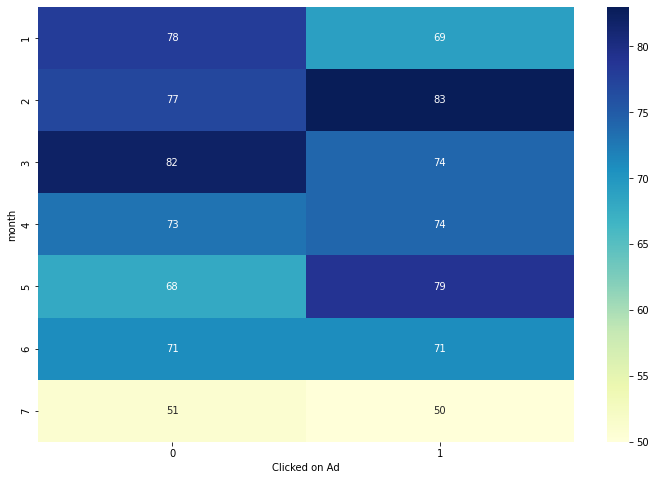

In [178]:
contingency_table = pd.crosstab(df['Clicked on Ad'], df['month'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Expected:")
print(expected)
print(f"Chi_Square_Score: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"dof: {dof}")

Expected:
[[73.5 80.  78.  73.5 73.5 71.  50.5]
 [73.5 80.  78.  73.5 73.5 71.  50.5]]
Chi_Square_Score: 2.026109781307801
p-value: 0.9172816839796131
dof: 6


Expected:
[[73.5 73.5]
 [80.  80. ]
 [78.  78. ]
 [73.5 73.5]
 [73.5 73.5]
 [71.  71. ]
 [50.5 50.5]]
Chi_Square_Score: 2.026109781307801
p-value: 0.9172816839796131
dof: 6


## F Distribution (Optional)
### Generate different F distributions from different Chai distributions using np.random.chisquare().
### Compare with scipy.stats.f()

In [174]:
chi_square_1 = np.random.chisquare(5, size=100)
chi_square_2 = np.random.chisquare(10, size=100)

f_distribution = (chi_square_1 / 5) / (chi_square_2 / 10)

In [175]:
f_distribution

array([1.19440031, 0.18765194, 0.21369115, 0.82660337, 0.30121962,
       1.16274264, 0.14001069, 0.22886484, 0.69268914, 0.29153381,
       0.30021848, 0.45495569, 0.17490948, 2.17898434, 1.16089247,
       0.90371273, 0.83559076, 1.44490595, 0.67197296, 0.4842048 ,
       0.84222137, 0.25452106, 0.25353912, 1.3486295 , 0.79804625,
       2.27476619, 0.62788773, 0.66583456, 2.43598268, 0.75055265,
       0.64390321, 0.85441279, 1.09787501, 0.39395829, 0.70145442,
       1.48722235, 1.69016712, 1.58097064, 1.60300138, 0.61853603,
       1.47758655, 1.4876821 , 0.43720895, 0.7870677 , 0.10066633,
       0.74279629, 1.88819748, 0.45643105, 0.44675353, 0.42001278,
       1.10225088, 0.65562188, 1.22361433, 0.17557532, 2.44210801,
       0.86813327, 1.2685232 , 2.30753126, 1.41569601, 5.13432877,
       0.90735277, 1.58705017, 1.09400013, 0.89918505, 0.35638973,
       0.90528529, 0.74933269, 0.21878843, 1.55651072, 1.60700669,
       0.50202245, 2.72472523, 2.44293261, 1.63381734, 0.23710

In [ ]:
#using scipy f

In [176]:
pdf_values = f.pdf(f_distribution, 5, 10)

In [177]:
pdf_values

array([0.40386867, 0.43015823, 0.47834082, 0.58196191, 0.59851456,
       0.41800535, 0.3270074 , 0.50370465, 0.64246027, 0.58819553,
       0.59747993, 0.68400861, 0.4044329 , 0.13267403, 0.4188422 ,
       0.54366151, 0.57756272, 0.30504537, 0.65046301, 0.68718475,
       0.5743022 , 0.54214283, 0.54077245, 0.34022881, 0.59575236,
       0.11939819, 0.66559077, 0.65273349, 0.10023579, 0.61781348,
       0.66042666, 0.56827836, 0.44800774, 0.66563534, 0.63892841,
       0.29067114, 0.23040111, 0.2611051 , 0.25459682, 0.66841117,
       0.29388684, 0.29051855, 0.68041391, 0.60096212, 0.22913088,
       0.62128131, 0.18382057, 0.68424839, 0.68251258, 0.67561092,
       0.4459428 , 0.65640023, 0.39113718, 0.40581176, 0.09957821,
       0.56146152, 0.37217413, 0.11519761, 0.31535249, 0.00868985,
       0.54183446, 0.2592928 , 0.44984092, 0.54593312, 0.64486634,
       0.54287226, 0.6183618 , 0.48708268, 0.26852369, 0.25343102,
       0.68760027, 0.07389163, 0.09949005, 0.24576351, 0.51665

## ANOVA
### Create a new column that identifies age groups (young,adult,old). You can use pd.cut()
### Check if the age group affects the Daily Time Spent on Site.
### Use only scipy.stats.f_oneway()
### Write your conclusion.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  1000 non-null   float64 
 1   Age                       1000 non-null   int64   
 2   Area Income               1000 non-null   float64 
 3   Daily Internet Usage      1000 non-null   float64 
 4   Ad Topic Line             1000 non-null   object  
 5   City                      1000 non-null   object  
 6   Male                      1000 non-null   int64   
 7   Country                   1000 non-null   object  
 8   Timestamp                 1000 non-null   object  
 9   Clicked on Ad             1000 non-null   int64   
 10  Age Group                 1000 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 79.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
 11  month                     1000 non-null   int64         
dtypes: datetime64[ns](1),

<Axes: xlabel='Daily Time Spent on Site', ylabel='Count'>

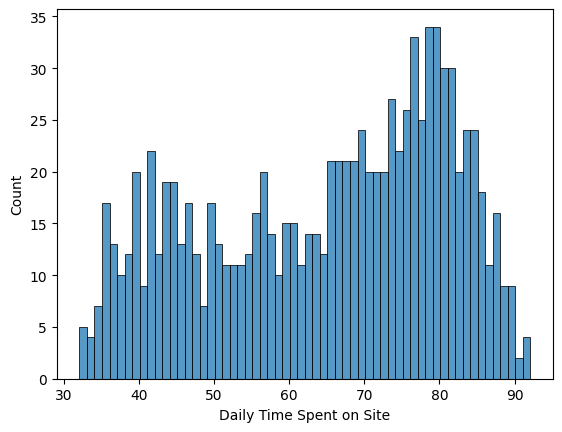

In [63]:
sns.histplot(x=df['Daily Time Spent on Site'],discrete=True)

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

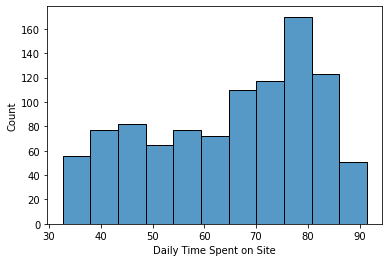

<Axes: xlabel='Age', ylabel='Count'>

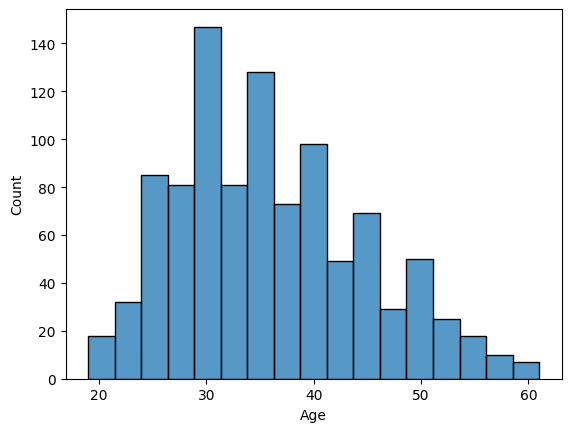

In [159]:
sns.histplot(x=df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

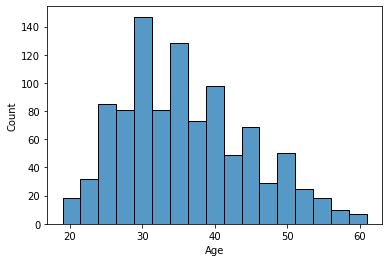

<Axes: xlabel='Age', ylabel='count'>

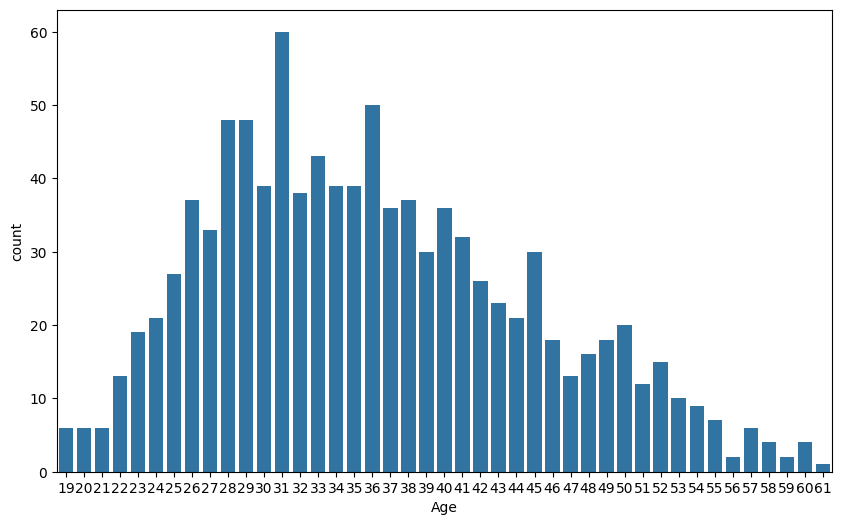

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

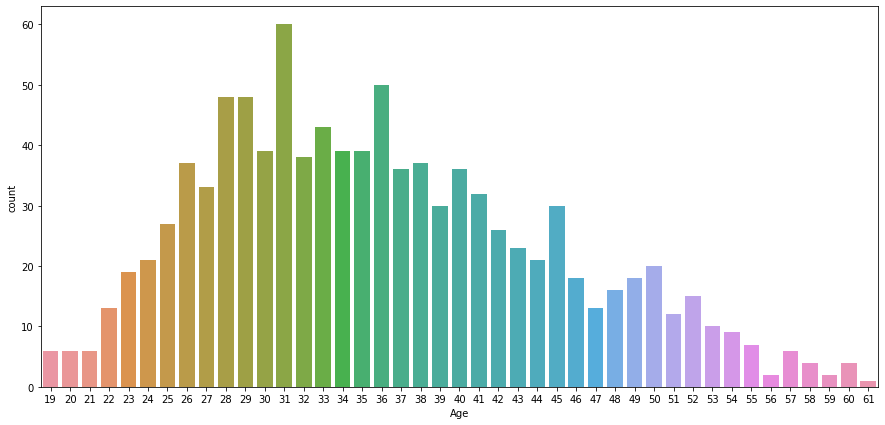

In [233]:
df['Age'].value_counts()

Age
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: count, dtype: int64

31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

In [68]:
df['Age Group'].value_counts()


Age Group
adult    644
young    264
old       92
Name: count, dtype: int64

Young    444
Adult    430
Old      126
Name: AgeGroups, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   object        
 9   Clicked on Ad             1000 non-null   int64         
 10  date                      1000 non-null   datetime64[ns]
 11  month                     1000 non-null   int64         
 12  AgeGroups            

In [160]:
labels = ['young', 'adult', 'old']
bins = [0, 33, 47, float('inf')]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
young_group = df[df['Age Group'] == 'young']['Daily Time Spent on Site']
adult_group = df[df['Age Group'] == 'adult']['Daily Time Spent on Site']
old_group = df[df['Age Group'] == 'old']['Daily Time Spent on Site']

<AxesSubplot:xlabel='AgeGroups', ylabel='Age'>

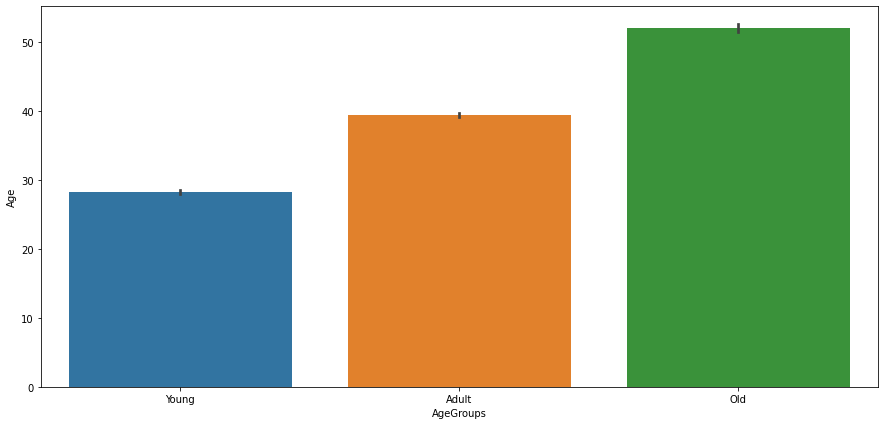

<Axes: xlabel='Age Group', ylabel='count'>

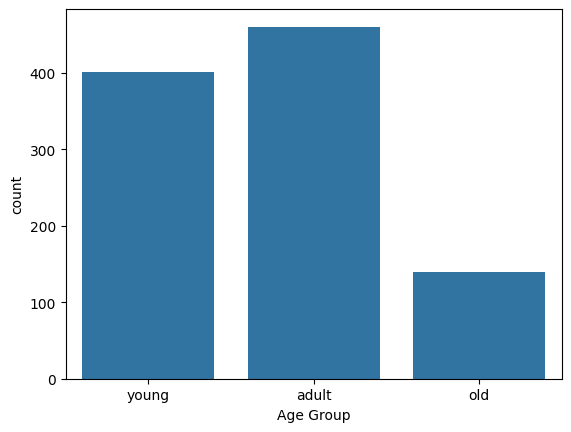

In [164]:
sns.countplot(x=df['Age Group'])

<AxesSubplot:xlabel='AgeGroups', ylabel='count'>

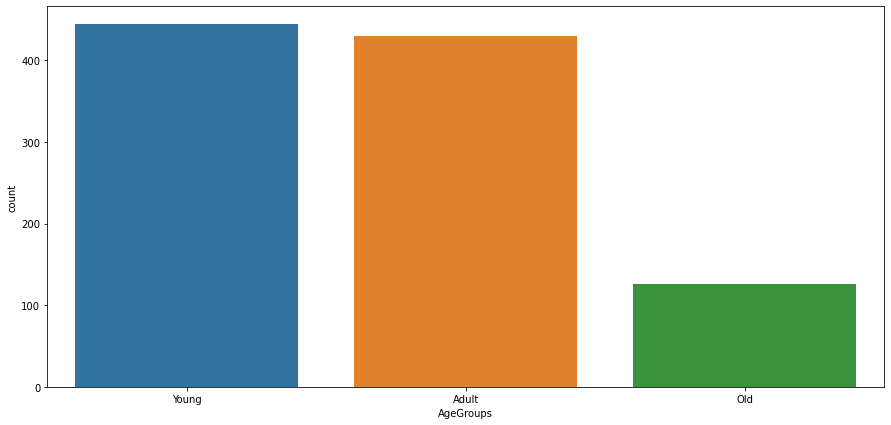

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

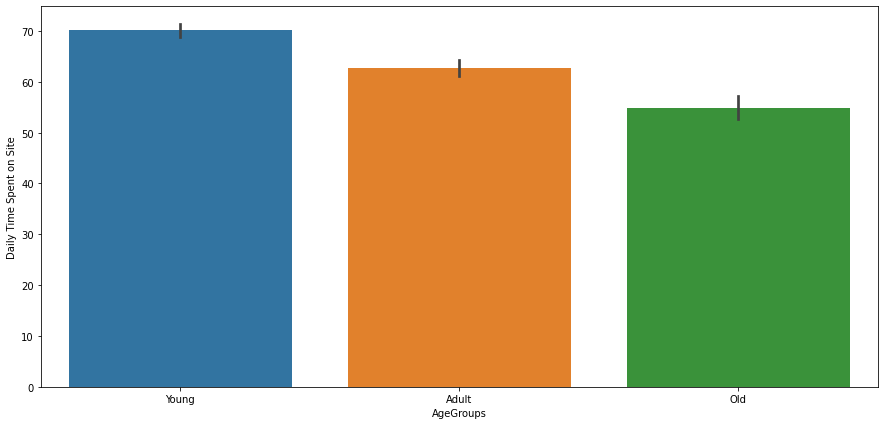

<Axes: xlabel='Age Group', ylabel='Daily Time Spent on Site'>

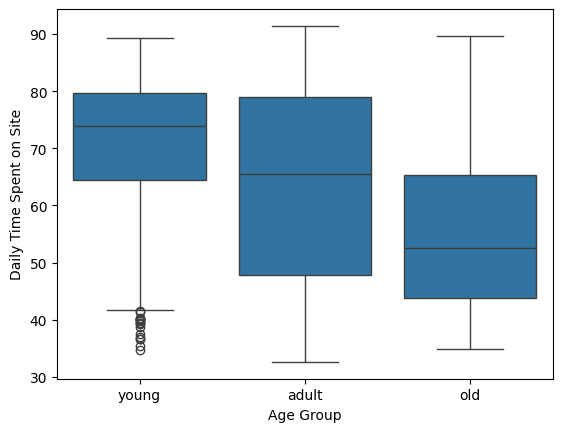

In [168]:
sns.boxplot(x='Age Group', y='Daily Time Spent on Site', data=df)

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

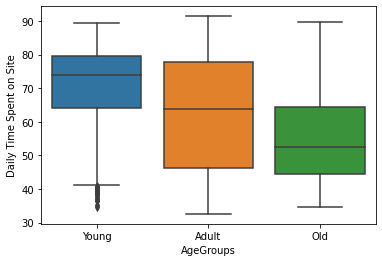

<Axes: xlabel='Age Group', ylabel='Daily Time Spent on Site'>

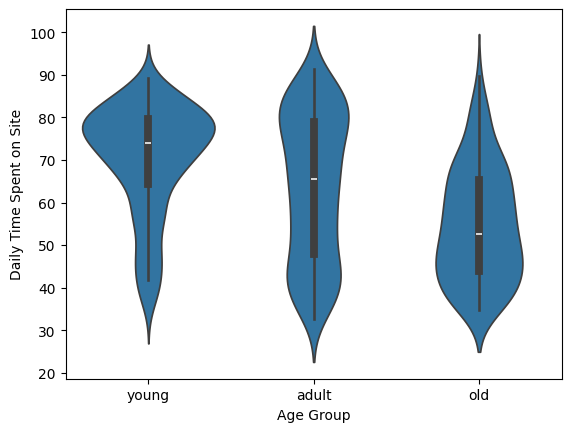

In [169]:
sns.violinplot(x='Age Group', y='Daily Time Spent on Site', data=df)

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

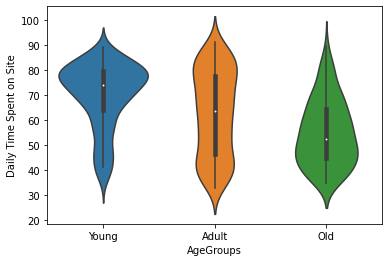

<Axes: xlabel='Age Group', ylabel='Daily Time Spent on Site'>

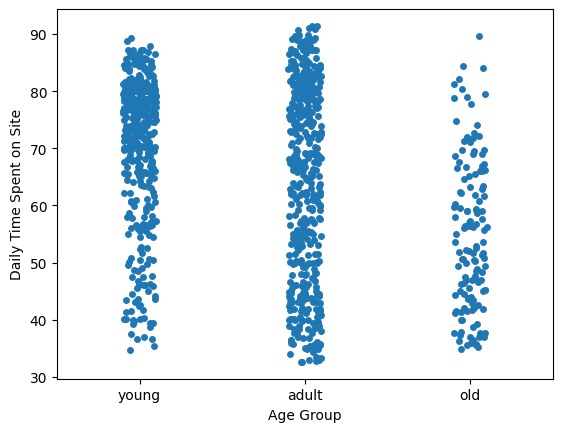

In [198]:
sns.stripplot(x='Age Group', y='Daily Time Spent on Site', data=df)

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

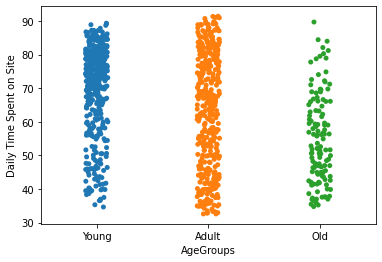

F-score: 59.26824116449695
p-value: 4.77389772073441e-25


In [135]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(young_group, adult_group, old_group)
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')


F-Statistic: 59.25151607240828
P-Value: 4.845794511400376e-25


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  1000 non-null   float64 
 1   Age                       1000 non-null   int64   
 2   Area Income               1000 non-null   float64 
 3   Daily Internet Usage      1000 non-null   float64 
 4   Ad Topic Line             1000 non-null   object  
 5   City                      1000 non-null   object  
 6   Male                      1000 non-null   int64   
 7   Country                   1000 non-null   object  
 8   Timestamp                 1000 non-null   object  
 9   Clicked on Ad             1000 non-null   int64   
 10  Age Group                 1000 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 79.4+ KB


In [67]:
df['Age Group'].value_counts()

Age Group
adult    644
young    264
old       92
Name: count, dtype: int64